In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale


import math

from IPython.display import display
import statsmodels.formula.api as smf

# Display preferences.
pd.options.display.float_format = '{:.3f}'.format




In [54]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header=4, skip_footer=3)
df.columns = [c.replace('\n', ' ') for c in df.columns]
df.to_csv('cleaned_crime.csv')
df = pd.read_csv('cleaned_crime.csv', index_col=0)

In [62]:
#df_offenses.head()
#Propertycrime=α+Population+Population2+Murder+Robbery
#Propertycrime=α+Population+Population2+Murder+Robbery

y = df['Property crime']

input_data = df[['Population', 'Murder and nonnegligent manslaughter', 'Robbery']].copy()
input_data['Pop2'] = df['Population'] ** 2
input_data.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Pop2
0,1861,0,0,3463321
1,2577,0,0,6640929
2,2846,0,0,8099716
3,97956,8,227,9595377936
4,6388,0,4,40806544


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

lg = LinearRegression()
lg.fit(scale(input_data), y)

print(lg.coef_)
#lg = LinearRegression()
#lg.fit(scale(input_data), df['Property crime'])
#[  1.59237145e-02   1.17559916e+02   2.09186426e+00  -1.01046282e-09]

[ 7155.82591664  2148.67724098  2153.67580861 -3812.9036369 ]


c:\users\lkonig\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


In [4]:
X

,TV,Radio,Newspaper
0,230.100,37.800,69.200
1,44.500,39.300,45.100
2,17.200,45.900,69.300
3,151.500,41.300,58.500
4,180.800,10.800,58.400
5,8.700,48.900,75.000
6,57.500,32.800,23.500
7,120.200,19.600,11.600
8,8.600,2.100,1.000
9,199.800,2.600,21.200


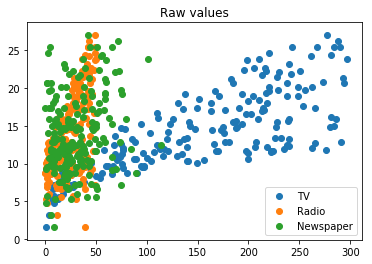

In [25]:
plt.scatter(data['TV'], data['Sales'], label='TV')
plt.scatter(data['Radio'], data['Sales'], label='Radio')
plt.scatter(data['Newspaper'], data['Sales'], label='Newspaper')
plt.legend()
plt.title('Raw values')



plt.show()


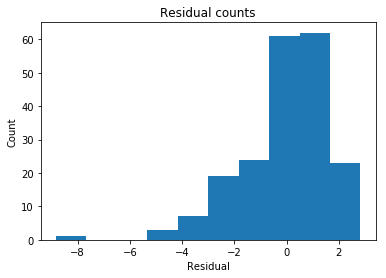

In [13]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

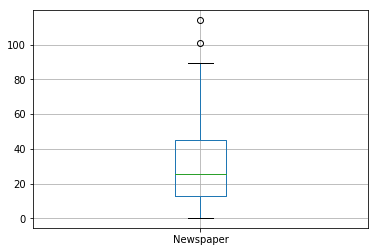

In [23]:
#X.boxplot('TV')
#X.boxplot('Radio')
X.boxplot('Newspaper')

In [155]:
#Removed outliers
data_updated = data[['TV','Radio','Newspaper','Sales']].query('Newspaper < 100 & Sales > 2')

data_updated['TV_sqrt'] = np.sqrt(data_updated['TV'])
data_updated['Radio_sqrt'] = np.sqrt(data_updated['Radio'])
data_updated['Newspaper_sqrt'] = np.sqrt(data_updated['Newspaper'])
data_updated['Sales_sqrt'] = np.sqrt(data_updated['Sales'])


# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data_updated['Sales_sqrt'].values.reshape(-1, 1)
#Y = data_updated['Sales'].values.reshape(-1, 1)
X = data_updated[['TV','Radio','Newspaper_sqrt']]


regr.fit(scale(X), scale(Y))

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))





Coefficients: 
 [[ 0.76056121  0.5291371  -0.00806319]]

Intercept: 
 [1.23230995e-16]

R-squared:
-39733.09908234014


C:\Users\lkonig\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


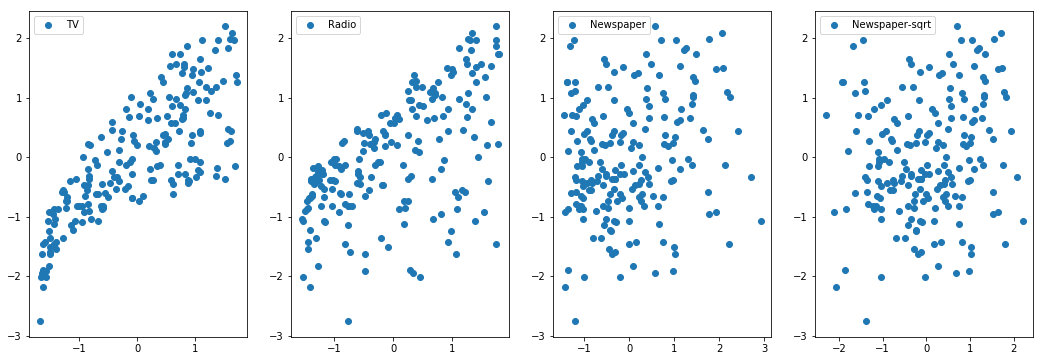

In [156]:
fig  = plt.figure(figsize=(18,6))


sqrt_newspaper = [math.sqrt(x) for x in  data_updated['Newspaper']]


plt.subplot(141)
plt.scatter(scale(X['TV']), scale(Y), label='TV')
plt.legend()

plt.subplot(142)
plt.scatter(scale(X['Radio']), scale(Y), label='Radio')
plt.legend()

plt.subplot(143)
plt.scatter(scale(data_updated['Newspaper']), scale(Y), label='Newspaper')
plt.legend()

plt.subplot(144)
plt.scatter(scale(sqrt_newspaper), scale(Y), label='Newspaper-sqrt')
plt.legend()





fig.show()

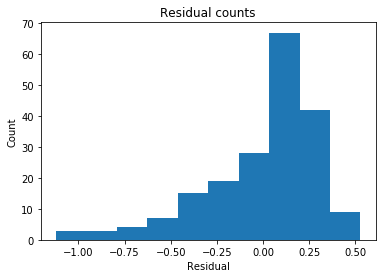

In [150]:
# Extract predicted values.
predicted = regr.predict(scale(X)).ravel()
actual = scale(data_updated['Sales_sqrt'])

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

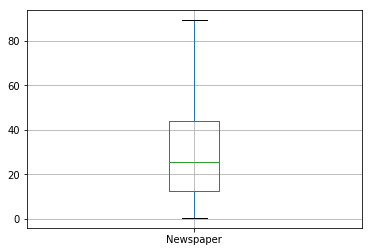

In [49]:
X.boxplot('Newspaper')

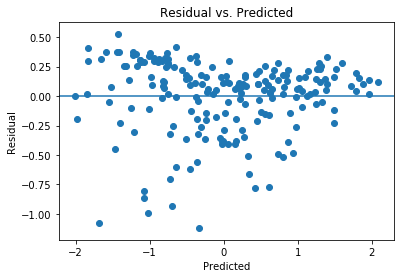

In [151]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

C:\Users\lkonig\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


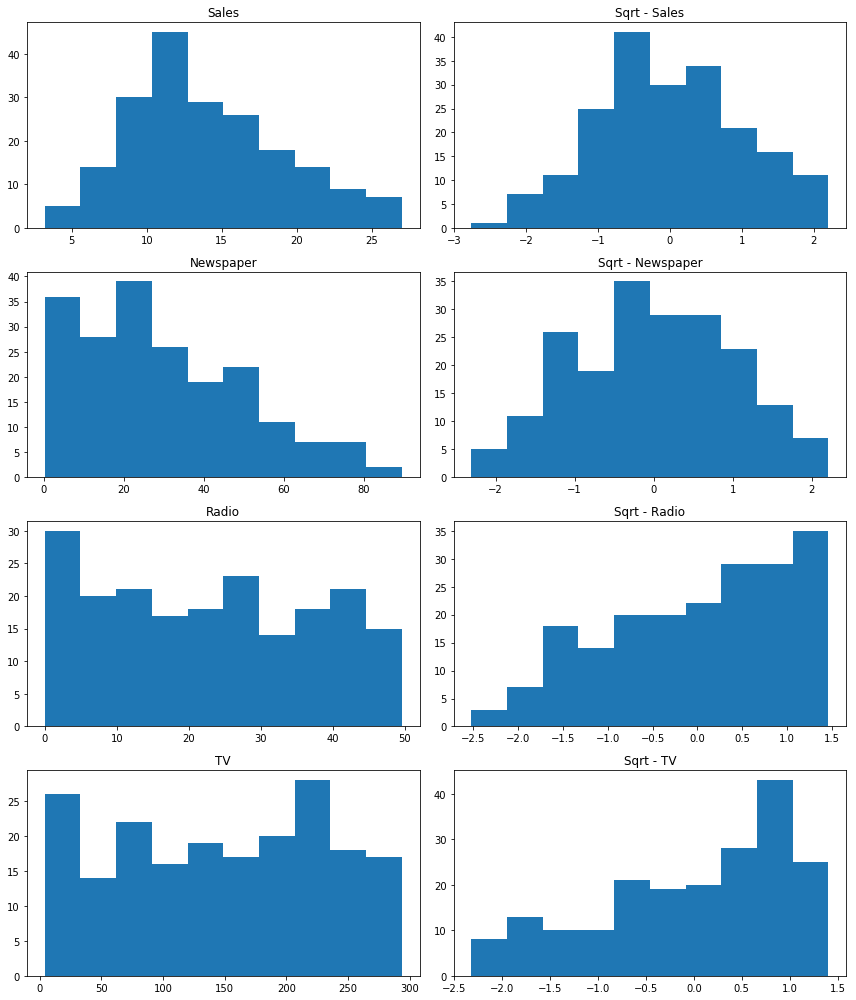

In [111]:
# plot with various axes scales
fig  = plt.figure(figsize=(12,14))

plt.subplot(421)
plt.hist(Y)
plt.title('Sales')

plt.subplot(422)
plt.hist(scale(np.sqrt(Y)))
plt.title('Sqrt - Sales')



plt.subplot(423)
plt.hist(X['Newspaper'])
plt.title('Newspaper')

plt.subplot(424)
plt.hist(scale(np.sqrt(X['Newspaper'])))
plt.title('Sqrt - Newspaper')



plt.subplot(425)
plt.hist(X['Radio'])
plt.title('Radio')

plt.subplot(426)
plt.hist(scale(np.sqrt(X['Radio'])))
plt.title('Sqrt - Radio')


plt.subplot(427)
plt.hist(X['TV'])
plt.title('TV')

plt.subplot(428)
plt.hist(scale(np.sqrt(X['TV'])))
plt.title('Sqrt - TV')


plt.tight_layout()
fig.show()

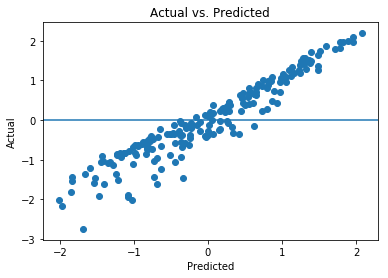

In [152]:
plt.scatter(predicted, actual)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.axhline(y=0)
plt.title('Actual vs. Predicted')
plt.show()


In [65]:
data_updated.sort_values('Sales', ascending = True)


,TV,Radio,Newspaper,Sales
155,4.100,11.600,5.700,3.200
8,8.600,2.100,1.000,4.800
108,13.100,0.400,25.600,5.300
78,5.400,29.900,9.400,5.300
56,7.300,28.100,41.400,5.500
22,13.200,15.900,49.600,5.600
132,8.400,27.200,2.100,5.700
192,17.200,4.100,31.600,5.900
119,19.400,16.000,22.300,6.600
126,7.800,38.900,50.600,6.600
